<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/ACM-TASKS/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target


In [ ]:
##this dataset doesn't have any missing values.
##In this dataset the label is  numerical(0 or 1).So,no need of encoding.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import StandardScaler
##beacuse knn depends on  the distance,so...its better to scale the features so that all the features will be aligned acc to one unit which gives much accurate results.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Standardize the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features into a DataFrame with proper column names
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)


In [ ]:
# Finding the value of k
# elbow method
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
error_rates = []
k_values = range(1, 21)  # Testing k values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on test set
    error_rate = 1 - accuracy_score(y_test, y_pred)  # Calculate error rate
    error_rates.append(error_rate)

In [ ]:
# Find the optimal k (lowest error rate)
optimal_k = k_values[np.argmin(error_rates)]
print(f"The optimal value of k is: {optimal_k}")

The optimal value of k is: 9


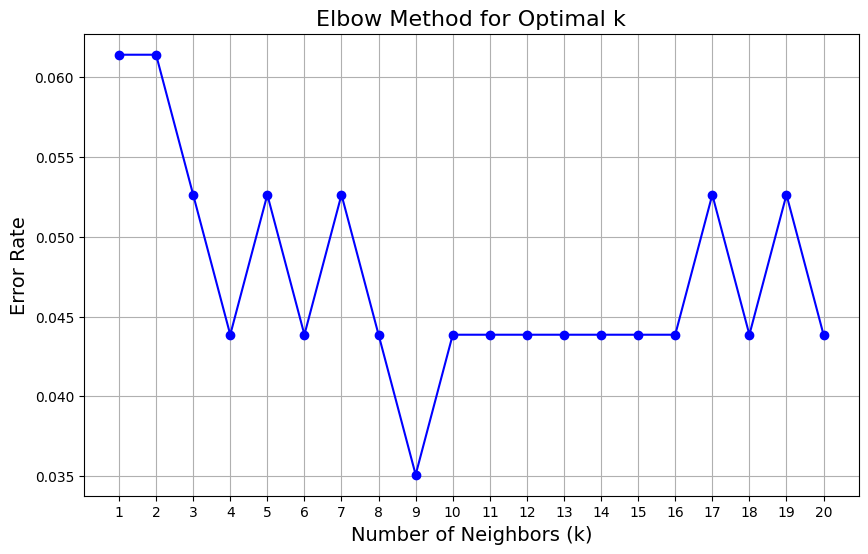

In [ ]:
# to know the perfect K VALUE we need to make a plot and find where the graph a sharp bend..and it is considered as the perfect k value.
#plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# training the model with the k value we got,i.e,9
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Evaluating the model's predictions
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model with k={optimal_k}: {accuracy:.2f}")

Accuracy of the KNN model with k=9: 0.96


In [ ]:
##evaluating the performence of the model using precision_score,recall_score,recall_score,roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.2f}")

Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Accuracy: 0.96
ROC AUC: 0.98


In [ ]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred):.4f}")
    ##randomly getting to know abt the accuracy of the model for different k values


k=1, Accuracy=0.9298
k=2, Accuracy=0.9298
k=3, Accuracy=0.9298
k=4, Accuracy=0.9386
k=5, Accuracy=0.9561
k=6, Accuracy=0.9649
k=7, Accuracy=0.9561
k=8, Accuracy=0.9561
k=9, Accuracy=0.9561
k=10, Accuracy=0.9737


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Correlation of each feature with the target
correlation = X.corrwith(y)

# Display correlation values
print(correlation.sort_values(ascending=False))

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

In [ ]:
##checking whether a column is contributing to the output or not.
##INFERENCE:
#High absolute correlation values (close to 1 or -1) indicate strong relationships with the target.
#Low absolute correlation values (close to 0) might indicate weak contributions.
